### Classification Module Exercises
`start`: wednesday, June 29th 2022

----
**4. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.**

- [ ] print the first 3 rows
- [ ] print the number of rows and columns (shape)
- [ ] print the column names
- [ ] print the data type of each column
- [ ] print the summary statistics for each of the numeric variables

In [1]:
from pydataset import data

In [2]:
df_iris = data("iris")
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [3]:
# print the first three (3) rows
from skimpy import clean_columns # for cleaning the column names
df_iris = clean_columns(df_iris, case = "snake") # removing the "name.name" formatting

df_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [4]:
# print the number of rows and columns ("shape" method)

df_iris.shape # df shape = (150 'rows', 5 'columns')

(150, 5)

In [5]:
# print the column names

df_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
# print the data type of ea. column 

df_iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [7]:
#  print the summary statistics for each of the numeric variables

iris_stats = df_iris.describe().T
iris_stats

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [8]:
iris_stats['range'] = iris_stats["max"] - iris_stats["min"]
iris_stats

,count,mean,std,min,25%,50%,75%,max,range
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9,3.6
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4,2.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9,5.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5,2.4


----
**5. Read the Table1_CustDetails table from your spreadsheet exercises google sheet into a dataframe named df_google_sheets.**

*Make sure that the spreadsheet is publicly visible under your sharing settings.*

- [ ] assign the first 100 rows to a new dataframe, df_google_sheets_sample
- [ ] print the number of rows of your original dataframe
- [ ] print the first 5 column names
- [ ] print the column names that have a data type of object
- [ ] compute the range for each of the numeric variables

In [9]:
import pandas as pd

sheet_url = 'https://docs.google.com/spreadsheets/d/1d2C6dz1bR-6GxsitV390xgRKdhIPJC6F03NM1KaEgLk/edit#gid=985024948'

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google_sheets = pd.read_csv(csv_export_url)
df_google_sheets.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,9.0
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,9.1
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,3.8
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,12.6
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,3.2


In [10]:
# [ ] assign the first 100 rows to a new dataframe, df_google_sheets_sample

df_google_sheets_sample = df_google_sheets.head(100)
df_google_sheets_sample.shape # checks out!

(100, 13)

In [11]:
# [ ] print the number of rows of your original dataframe

df_google_sheets.shape[0] # 7049 rows

7049

In [12]:
# [ ] print the first 5 column names

df_google_sheets.columns[:4]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner'], dtype='object')

In [13]:
# [ ] print the column names that have a data type of object


df_google_sheets.select_dtypes("object").columns

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn'],
      dtype='object')

In [14]:
# [ ] compute the range for each of the numeric variables

telco_stats = df_google_sheets[["monthly_charges", "total_charges"]].describe().T
telco_stats

,count,mean,std,min,25%,50%,75%,max
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80


In [15]:
telco_stats["range"] = telco_stats["max"] - telco_stats["min"]
telco_stats

,count,mean,std,min,25%,50%,75%,max,range
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75,100.5
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80,8666.0


----

**6. Download your spreadsheet exercises google sheet as an excel file (File → Download → Microsoft Excel). Read the Table1_CustDetails worksheet into a dataframe named df_excel.**

- [ ] assign the first 100 rows to a new dataframe, df_excel_sample
- [ ] print the number of rows of your original dataframe
- [ ] print the first 5 column names
- [ ] print the column names that have a data type of object
- [ ] compute the range for each of the numeric variables.

In [16]:
df_excel = pd.read_excel("/Users/mijailmariano/Downloads/telco_29JUN22.xlsx")
df_excel.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,0.0,Yes,Yes,1.0,1.0,1.0,Mailed check,65.6,593.30,No,9.044207
1,0003-MKNFE,Male,0.0,No,No,2.0,1.0,0.0,Mailed check,59.9,542.40,No,9.055092
2,0004-TLHLJ,Male,0.0,No,No,1.0,2.0,0.0,Electronic check,73.9,280.85,Yes,3.800406
3,0011-IGKFF,Male,1.0,Yes,No,1.0,2.0,0.0,Electronic check,98.0,1237.85,Yes,12.631122
4,0013-EXCHZ,Female,1.0,Yes,No,1.0,2.0,0.0,Mailed check,83.9,267.40,Yes,3.187128


In [17]:
# [ ] assign the first 100 rows to a new dataframe, df_excel_sample

df_excel_sample = df_excel.head(100)
len(df_excel_sample) # checks out!

100

In [18]:
# [ ] print the number of rows of your original dataframe

df_excel.shape[0] # 7049 total rows

7049

In [19]:
# [ ] print the first 5 column names

df_excel.columns[:4]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner'], dtype='object')

In [20]:
# [ ] print the column names that have a data type of object

df_excel.select_dtypes(include="object").columns

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn'],
      dtype='object')

In [21]:
# [ ] compute the range for each of the numeric variables

numerical_range = df_excel.select_dtypes(include=["int", "float"]).max() - df_excel.select_dtypes(include=["int", "float"]).min()
numerical_range.round(2)

is_senior_citizen       1.00
phone_service           2.00
internet_service        2.00
contract_type           2.00
monthly_charges       100.50
total_charges        8666.00
tenure                 79.34
dtype: float64

----

**7. Read the data from this google sheet into a dataframe, df_google**

- [ ] print the first 3 rows
- [ ] print the number of rows and columns
- [ ] print the column names
- [ ] print the data type of each column
- [ ] print the summary statistics for each of the numeric variables
- [ ] print the unique values for each of your categorical variables

In [22]:
# getting Google Sheets spreadsheet url 
sheet_url = 'https://docs.google.com/spreadsheets/d/1NPDGUGESbwKRZ92eYl9_J703fMELWfRipma6ftA18EE/edit#gid=341089357'

# replacing key words in url - for access
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=') 

In [23]:
# creating a dataframe from the imported Google Spreadsheet CSV

df_google = pd.read_csv(csv_export_url)

In [24]:
# [ ] print the first 3 rows

df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [25]:
# [ ] print the number of rows and columns

df_google.shape # (891 rows, 12 columns)

(891, 12)

In [26]:
# [ ] print the column names

df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [27]:
# [ ] print the data type of each column

df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [28]:
# [ ] print the summary statistics for each of the numeric variables

df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
# [ ] print the unique values for each of your categorical variables

df_google.select_dtypes(exclude=["int", "float"]).value_counts(normalize=True)

Name                                Sex     Ticket    Cabin  Embarked
Allen, Miss. Elisabeth Walton       female  24160     B5     S           0.00495
Newsom, Miss. Helen Monypeny        female  11752     D47    S           0.00495
Molson, Mr. Harry Markland          male    113787    C30    S           0.00495
Moor, Master. Meier                 male    392096    E121   S           0.00495
Moor, Mrs. (Beila)                  female  392096    E121   S           0.00495
                                                                          ...   
Frolicher, Miss. Hedwig Margaritha  female  13568     B39    C           0.00495
Frolicher-Stehli, Mr. Maxmillian    male    13567     B41    C           0.00495
Fry, Mr. Richard                    male    112058    B102   S           0.00495
Futrelle, Mr. Jacques Heath         male    113803    C123   S           0.00495
Young, Miss. Marie Grice            female  PC 17760  C32    C           0.00495
Length: 202, dtype: float64

In [30]:
# "Name" column 
df_google.Name.unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [31]:
# "Sex" column
df_google.Sex.unique()

array(['male', 'female'], dtype=object)

In [32]:
# "Ticket" column
df_google.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [33]:
# "Cabin" column
df_google.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [34]:
# "Embarked" column
df_google.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

-----

**Make a new python module, acquire.py to hold the following data aquisition functions:**

- [ ] Make a function named get_titanic_data that returns the titanic data from the codeup data science database as a pandas data frame. Obtain your data from the Codeup Data Science Database.

- [ ] Make a function named get_iris_data that returns the data from the iris_db on the codeup data science database as a pandas data frame. The returned data frame should include the actual name of the species in addition to the species_ids. Obtain your data from the Codeup Data Science Database.

- [ ] Make a function named get_telco_data that returns the data from the telco_churn database in SQL. In your SQL, be sure to join all 4 tables together, so that the resulting dataframe contains all the contract, payment, and internet service options. Obtain your data from the Codeup Data Science Database.

- [ ] Once you've got your get_titanic_data, get_iris_data, and get_telco_data functions written, now it's time to add caching to them. To do this, edit the beginning of the function to check for the local filename of telco.csv, titanic.csv, or iris.csv. If they exist, use the .csv file. If the file doesn't exist, then produce the SQL and pandas necessary to create a dataframe, then write the dataframe to a .csv file with the appropriate name.

In [35]:
import acquire
from acquire import get_iris_data, get_telco_data, get_titanic_data

In [36]:
# importing the titatic function/df from the acquire module
get_titanic_data().head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [37]:
# importing the iris function/df from the acquire module
get_iris_data().head()

,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,setosa,2,4.9,3.0,1.4,0.2
2,1,setosa,3,4.7,3.2,1.3,0.2
3,1,setosa,4,4.6,3.1,1.5,0.2
4,1,setosa,5,5.0,3.6,1.4,0.2


In [38]:
# importing the telco function/df from the acquire module
get_telco_data().head()

,internet_service_type_id,internet_service_type,payment_type_id,payment_type,contract_type_id,contract_type,customer_id,gender,senior_citizen,partner,...,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn
0,1,DSL,2,Mailed check,2,One year,0002-ORFBO,Female,0,Yes,...,No,Yes,No,Yes,Yes,No,Yes,65.60,593.3,No
1,1,DSL,2,Mailed check,1,Month-to-month,0003-MKNFE,Male,0,No,...,No,No,No,No,No,Yes,No,59.90,542.4,No
2,1,DSL,4,Credit card (automatic),1,Month-to-month,0013-MHZWF,Female,0,No,...,No,No,No,Yes,Yes,Yes,Yes,69.40,571.45,No
3,1,DSL,1,Electronic check,1,Month-to-month,0015-UOCOJ,Female,1,No,...,Yes,No,No,No,No,No,Yes,48.20,340.35,No
4,1,DSL,2,Mailed check,3,Two year,0016-QLJIS,Female,0,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,90.45,5957.9,No


----
### Data Preparation Exervices:
    date: thursday, June 30th 2022

* The end product of this exercise should be the specified functions in a python script named prepare.py. Do these in your classification_exercises.ipynb first, then transfer to the prepare.py file.

* This work should all be saved in your local classification-exercises repo. Then add, commit, and push your changes.


**Using the Iris Data:**

1. - [ ] Use the function defined in acquire.py to load the iris data.

2. - [ ] Drop the species_id and measurement_id columns.

3. - [ ] Rename the species_name column to just species.

4. - [ ] Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

5. - [ ] Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [39]:
# 1. - [ ] Use the function defined in acquire.py to load the iris data.

iris_df = acquire.get_iris_data()
iris_df.head()

,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,setosa,2,4.9,3.0,1.4,0.2
2,1,setosa,3,4.7,3.2,1.3,0.2
3,1,setosa,4,4.6,3.1,1.5,0.2
4,1,setosa,5,5.0,3.6,1.4,0.2


In [40]:
# 2. - [ ] Drop the species_id and measurement_id columns.

iris_df = iris_df.drop(columns=["species_id", "measurement_id"])
iris_df.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


In [41]:
# 3. - [ ] Rename the species_name column to just species.

iris_df = iris_df.rename(columns={"species_name": "species"})
iris_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


In [42]:
# 4. - [ ] Create dummy variables of the species name and concatenate onto the iris dataframe. 
# (This is for practice, we don't always have to encode the target, 
# but if we used species as a feature, we would need to encode it).

dummy_df = pd.get_dummies(iris_df[["species"]]) # since it's a small dataset, i will not pass the "drop_first" parameter in the chance that i need this information in the future
dummy_df.head()

,species_setosa,species_versicolor,species_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [43]:
iris_df = pd.concat([iris_df, dummy_df], axis=1) # here i need to pass "axis = 1" to concat across the columns
iris_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,1,0,0
1,setosa,4.9,3.0,1.4,0.2,1,0,0
2,setosa,4.7,3.2,1.3,0.2,1,0,0
3,setosa,4.6,3.1,1.5,0.2,1,0,0
4,setosa,5.0,3.6,1.4,0.2,1,0,0


In [44]:
# 5. - [ ] Create a function named prep_iris that accepts the untransformed iris data, 
# and returns the data with the transformations above applied.

def prep_iris(df):
    df = df.drop(columns=["species_id", "measurement_id"])
    df = df.rename(columns={"species_name": "species"})
    dummy_df = pd.get_dummies(df[["species"]], drop_first=True)
    df = pd.concat([df, dummy_df], axis=1)
    return df

In [45]:
# onto testing the function works and does what is intended to do

df = acquire.get_iris_data()

In [46]:
df.head() # ensuring the df loaded correctly

,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,setosa,2,4.9,3.0,1.4,0.2
2,1,setosa,3,4.7,3.2,1.3,0.2
3,1,setosa,4,4.6,3.1,1.5,0.2
4,1,setosa,5,5.0,3.6,1.4,0.2


In [47]:
df = prep_iris(df) 
df.head() # function checks out!

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


----
**Using the Titanic dataset**

1. - [ ] Use the function defined in acquire.py to load the Titanic data.

2. - [ ] Drop any unnecessary, unhelpful, or duplicated columns.

3. - [ ] Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

4. - [ ] Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [48]:
# 1. - [ ] Use the function defined in acquire.py to load the Titanic data.

acquire.get_titanic_data().head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [49]:
titanic_df = acquire.get_titanic_data()
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [50]:
# 2. - [ ] Drop any unnecessary, unhelpful, or duplicated columns.
import seaborn as sns
import matplotlib.pyplot as plt 

num_cols = titanic_df.select_dtypes(include="number").columns
num_cols

Index(['passenger_id', 'survived', 'pclass', 'age', 'sibsp', 'parch', 'fare',
       'alone'],
      dtype='object')

In [51]:
titanic_df.shape[0] # checking the number of rows/obervations
# 891 total observations

891

<Figure size 432x288 with 0 Axes>

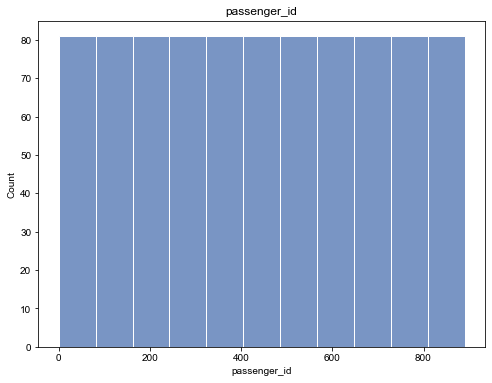

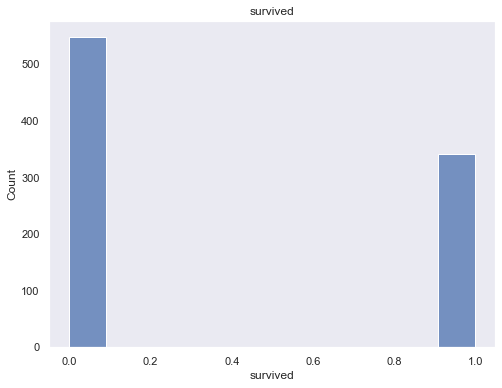

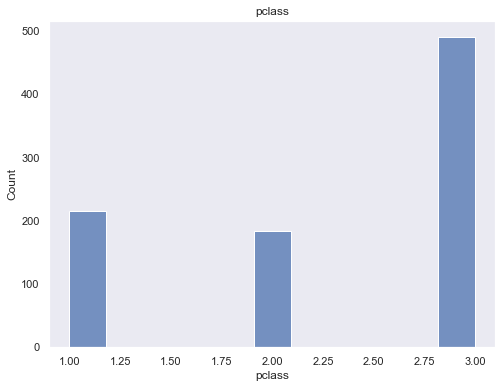

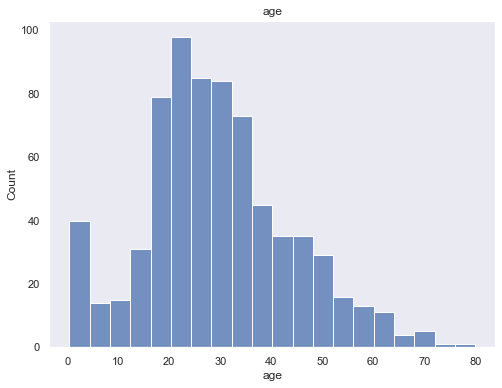

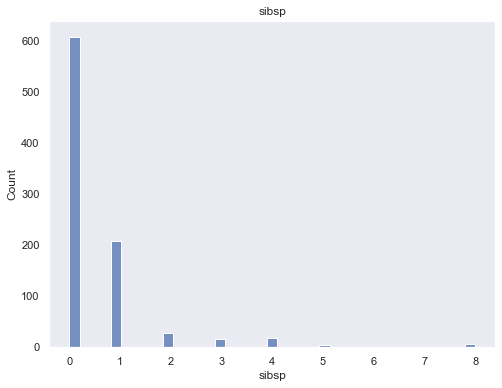

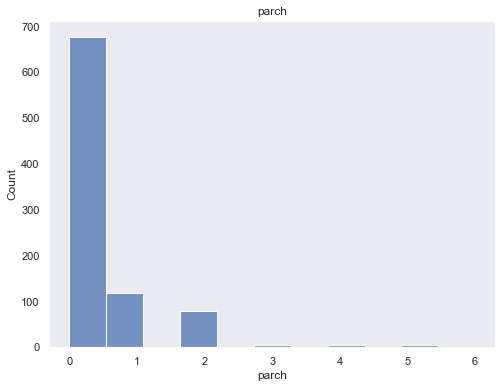

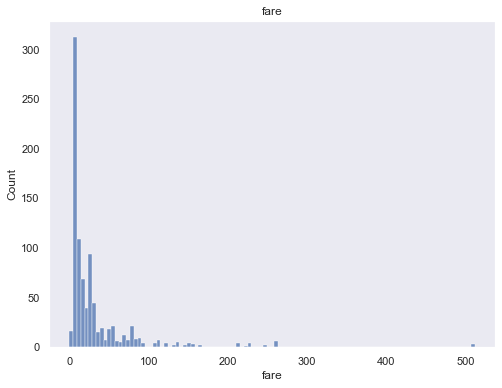

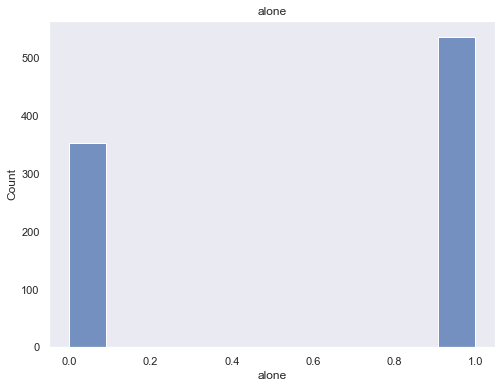

In [52]:
# plotting numerical type columns

for i, col in enumerate(num_cols): # for index & col in enumerated list - "num_cols"
    plt.figure(i)
    plt.figure(figsize=(8, 6))
    plt.title(col)
    sns.set_theme(style="dark")
    sns.histplot(x=col, data=titanic_df)

In [53]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 129.7+ KB


In [54]:
titanic_df.isna().sum() # exploring the dataset further i see that there is quite a number of missing values in "age" and "deck" columns -

passenger_id      0
survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          2
class             0
deck            688
embark_town       2
alone             0
dtype: int64

In [55]:
# dropping the following columns from titanic_df:
# "age" -> 177 of 891 missing values...filling this data may incorrectly skew modeling results??
# "deck" -> 688 of 891 missing values
# "passenger_id" -> unnessary column for modeling
# "embarked" -> appears to be an id/classification column for "embark_town", meaning this information may be duplicative

In [56]:
titanic_df = titanic_df.drop(columns=["age", "deck", "passenger_id", "embarked"])
titanic_df.head() # checks out!

,survived,pclass,sex,sibsp,parch,fare,class,embark_town,alone
0,0,3,male,1,0,7.2500,Third,Southampton,0
1,1,1,female,1,0,71.2833,First,Cherbourg,0
2,1,3,female,0,0,7.9250,Third,Southampton,1
3,1,1,female,1,0,53.1000,First,Southampton,0
4,0,3,male,0,0,8.0500,Third,Southampton,1


In [57]:
titanic_df.columns.unique()

Index(['survived', 'pclass', 'sex', 'sibsp', 'parch', 'fare', 'class',
       'embark_town', 'alone'],
      dtype='object')

In [58]:
# 3. - [ ] Encode the categorical columns. 
# Create dummy variables of the categorical columns and concatenate them onto the dataframe.

titanic_df.head()

# catergorical columns include:
# sex 
# class
# embark_town

,survived,pclass,sex,sibsp,parch,fare,class,embark_town,alone
0,0,3,male,1,0,7.2500,Third,Southampton,0
1,1,1,female,1,0,71.2833,First,Cherbourg,0
2,1,3,female,0,0,7.9250,Third,Southampton,1
3,1,1,female,1,0,53.1000,First,Southampton,0
4,0,3,male,0,0,8.0500,Third,Southampton,1


In [59]:
titanic_df.select_dtypes(include="object").columns # categorical columns are also all my "object" type columns in the titanic df

Index(['sex', 'class', 'embark_town'], dtype='object')

In [60]:
dummy_df = pd.get_dummies(titanic_df[["sex", "class", "embark_town"]], drop_first=True)
dummy_df.head() # verifying that "dummy_df" saved accordingly

,sex_male,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton
0,1,0,1,0,1
1,0,0,0,0,0
2,0,0,1,0,1
3,0,0,0,0,1
4,1,0,1,0,1


In [61]:
# concatinating the dummy_df/columns:

titanic_df = pd.concat([titanic_df, dummy_df], axis=1) # expressing "axis=1" to indicate "concatinate" along columns and NOT index or default...axis=0

In [62]:
# verifying both dataframes concatenated correctly
titanic_df.head() # check out!

,survived,pclass,sex,sibsp,parch,fare,class,embark_town,alone,sex_male,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,1,0,7.2500,Third,Southampton,0,1,0,1,0,1
1,1,1,female,1,0,71.2833,First,Cherbourg,0,0,0,0,0,0
2,1,3,female,0,0,7.9250,Third,Southampton,1,0,0,1,0,1
3,1,1,female,1,0,53.1000,First,Southampton,0,0,0,0,0,1
4,0,3,male,0,0,8.0500,Third,Southampton,1,1,0,1,0,1


In [63]:
# exercising column name cleaning -

titanic_df = clean_columns(titanic_df, case = "snake")

In [64]:
titanic_df.head()

,survived,pclass,sex,sibsp,parch,fare,class,embark_town,alone,sex_male,class_second,class_third,embark_town_queenstown,embark_town_southampton
0,0,3,male,1,0,7.2500,Third,Southampton,0,1,0,1,0,1
1,1,1,female,1,0,71.2833,First,Cherbourg,0,0,0,0,0,0
2,1,3,female,0,0,7.9250,Third,Southampton,1,0,0,1,0,1
3,1,1,female,1,0,53.1000,First,Southampton,0,0,0,0,0,1
4,0,3,male,0,0,8.0500,Third,Southampton,1,1,0,1,0,1


In [65]:
titanic_df.isnull().sum() # here i can see that i still have 1 column with 2 missing values/observations

# i will use the "fillna" method to fill these values with the column mode

survived                   0
pclass                     0
sex                        0
sibsp                      0
parch                      0
fare                       0
class                      0
embark_town                2
alone                      0
sex_male                   0
class_second               0
class_third                0
embark_town_queenstown     0
embark_town_southampton    0
dtype: int64

In [66]:
titanic_df = titanic_df.fillna(titanic_df.mode().iloc[0]) # where here i am saying: 

# (fillna) = fill missing values/Nulls
# (titanic_df.mode().iloc[0]) = return the mode for the specific column and replace the missing value with that column's mode value 
# iloc[0] "freezes" the index/place? of the checked column

In [67]:
titanic_df.isna().sum() # verifying no missing values
# checks out!

survived                   0
pclass                     0
sex                        0
sibsp                      0
parch                      0
fare                       0
class                      0
embark_town                0
alone                      0
sex_male                   0
class_second               0
class_third                0
embark_town_queenstown     0
embark_town_southampton    0
dtype: int64

In [68]:
# 4. - [ ] Create a function named prep_titanic that accepts the raw titanic data, and 
# returns the data with the transformations above applied.

def prep_titanic(df):
    df = df.drop(columns=["age", "deck", "passenger_id", "embarked"])
    df = df.fillna(df.mode().iloc[0])
    dummy_df = pd.get_dummies(df[["sex", "class", "embark_town"]], drop_first=True)
    df = pd.concat([df, dummy_df], axis=1)
    return df

In [69]:
# verifying that newly created function works

df = acquire.get_titanic_data()

In [70]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [71]:
df = prep_titanic(df)

In [72]:
df.isna().sum() # no missing values!

survived                   0
pclass                     0
sex                        0
sibsp                      0
parch                      0
fare                       0
class                      0
embark_town                0
alone                      0
sex_male                   0
class_Second               0
class_Third                0
embark_town_Queenstown     0
embark_town_Southampton    0
dtype: int64

In [73]:
df.head() # functions works correctly!

,survived,pclass,sex,sibsp,parch,fare,class,embark_town,alone,sex_male,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,1,0,7.2500,Third,Southampton,0,1,0,1,0,1
1,1,1,female,1,0,71.2833,First,Cherbourg,0,0,0,0,0,0
2,1,3,female,0,0,7.9250,Third,Southampton,1,0,0,1,0,1
3,1,1,female,1,0,53.1000,First,Southampton,0,0,0,0,0,1
4,0,3,male,0,0,8.0500,Third,Southampton,1,1,0,1,0,1


-----

**Using the Telco dataset**

1. - [ ] Use the function defined in acquire.py to load the Telco data.

2. - [ ] Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

3. - [ ] Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

4. - [ ] Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [74]:
# 1. - [ ] Use the function defined in acquire.py to load the Telco data.

telco_df = acquire.get_telco_data()
telco_df.head()

,internet_service_type_id,internet_service_type,payment_type_id,payment_type,contract_type_id,contract_type,customer_id,gender,senior_citizen,partner,...,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn
0,1,DSL,2,Mailed check,2,One year,0002-ORFBO,Female,0,Yes,...,No,Yes,No,Yes,Yes,No,Yes,65.60,593.3,No
1,1,DSL,2,Mailed check,1,Month-to-month,0003-MKNFE,Male,0,No,...,No,No,No,No,No,Yes,No,59.90,542.4,No
2,1,DSL,4,Credit card (automatic),1,Month-to-month,0013-MHZWF,Female,0,No,...,No,No,No,Yes,Yes,Yes,Yes,69.40,571.45,No
3,1,DSL,1,Electronic check,1,Month-to-month,0015-UOCOJ,Female,1,No,...,Yes,No,No,No,No,No,Yes,48.20,340.35,No
4,1,DSL,2,Mailed check,3,Two year,0016-QLJIS,Female,0,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,90.45,5957.9,No


In [75]:
telco_df.shape # (7043 rows/observations, 24 columns/features)

(7043, 24)

In [76]:
# 2. - [ ] Drop any unnecessary, unhelpful, or duplicated columns. 
# This could mean dropping foreign key columns but keeping the corresponding string values, for example.

telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   internet_service_type_id  7043 non-null   int64  
 1   internet_service_type     7043 non-null   object 
 2   payment_type_id           7043 non-null   int64  
 3   payment_type              7043 non-null   object 
 4   contract_type_id          7043 non-null   int64  
 5   contract_type             7043 non-null   object 
 6   customer_id               7043 non-null   object 
 7   gender                    7043 non-null   object 
 8   senior_citizen            7043 non-null   int64  
 9   partner                   7043 non-null   object 
 10  dependents                7043 non-null   object 
 11  tenure                    7043 non-null   int64  
 12  phone_service             7043 non-null   object 
 13  multiple_lines            7043 non-null   object 
 14  online_s

In [77]:
telco_df.isnull().sum() # no missing values in the dataset

internet_service_type_id    0
internet_service_type       0
payment_type_id             0
payment_type                0
contract_type_id            0
contract_type               0
customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
paperless_billing           0
monthly_charges             0
total_charges               0
churn                       0
dtype: int64

In [78]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   internet_service_type_id  7043 non-null   int64  
 1   internet_service_type     7043 non-null   object 
 2   payment_type_id           7043 non-null   int64  
 3   payment_type              7043 non-null   object 
 4   contract_type_id          7043 non-null   int64  
 5   contract_type             7043 non-null   object 
 6   customer_id               7043 non-null   object 
 7   gender                    7043 non-null   object 
 8   senior_citizen            7043 non-null   int64  
 9   partner                   7043 non-null   object 
 10  dependents                7043 non-null   object 
 11  tenure                    7043 non-null   int64  
 12  phone_service             7043 non-null   object 
 13  multiple_lines            7043 non-null   object 
 14  online_s

In [79]:
telco_df.select_dtypes(include = "number").columns

# here i can remove the following columns from the df:

# "internet_service_type_id" (reason:)
# "payment_type_id" (reason:)
# "contract_type_id" (reason:)
# "customer_id" ???? --> may be needed to identify the individual account holder

Index(['internet_service_type_id', 'payment_type_id', 'contract_type_id',
       'senior_citizen', 'tenure', 'monthly_charges'],
      dtype='object')

In [80]:
telco_df = telco_df.drop(columns=['internet_service_type_id', 'payment_type_id', 'contract_type_id'])

In [81]:
# checking the data after dropping columns:
telco_df.head() # checks out!

,internet_service_type,payment_type,contract_type,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn
0,DSL,Mailed check,One year,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,No,Yes,No,Yes,Yes,No,Yes,65.60,593.3,No
1,DSL,Mailed check,Month-to-month,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,No,No,No,Yes,No,59.90,542.4,No
2,DSL,Credit card (automatic),Month-to-month,0013-MHZWF,Female,0,No,Yes,9,Yes,...,No,No,No,Yes,Yes,Yes,Yes,69.40,571.45,No
3,DSL,Electronic check,Month-to-month,0015-UOCOJ,Female,1,No,No,7,Yes,...,Yes,No,No,No,No,No,Yes,48.20,340.35,No
4,DSL,Mailed check,Two year,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,90.45,5957.9,No


In [82]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   internet_service_type  7043 non-null   object 
 1   payment_type           7043 non-null   object 
 2   contract_type          7043 non-null   object 
 3   customer_id            7043 non-null   object 
 4   gender                 7043 non-null   object 
 5   senior_citizen         7043 non-null   int64  
 6   partner                7043 non-null   object 
 7   dependents             7043 non-null   object 
 8   tenure                 7043 non-null   int64  
 9   phone_service          7043 non-null   object 
 10  multiple_lines         7043 non-null   object 
 11  online_security        7043 non-null   object 
 12  online_backup          7043 non-null   object 
 13  device_protection      7043 non-null   object 
 14  tech_support           7043 non-null   object 
 15  stre

In [83]:
telco_df.select_dtypes(exclude="number").columns
# "total_charges" will need to be converted to float type?

Index(['internet_service_type', 'payment_type', 'contract_type', 'customer_id',
       'gender', 'partner', 'dependents', 'phone_service', 'multiple_lines',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'paperless_billing',
       'total_charges', 'churn'],
      dtype='object')

In [84]:
telco_df["total_charges"] = pd.to_numeric(telco_df["total_charges"], errors="coerce")
# "astype()" method did not work in this instance, so needed the above pandas method to convert this column to float type

In [85]:
telco_df.total_charges.dtype # checks out!

dtype('float64')

In [86]:
telco_df.isna().sum() # where "total_charges" has 11 missing values

# to fill-in these missing values, i will use a similar method as previously done with the titanic dataset (using the median for total charges)
# reason for median is that this feature, "total_charges" represents the total amount one would pay in their tenure at this company 
# where the mode could be misleading if the customer had a short-lived tenure at the company or vice-verse, with long-term tenured customers

internet_service_type     0
payment_type              0
contract_type             0
customer_id               0
gender                    0
senior_citizen            0
partner                   0
dependents                0
tenure                    0
phone_service             0
multiple_lines            0
online_security           0
online_backup             0
device_protection         0
tech_support              0
streaming_tv              0
streaming_movies          0
paperless_billing         0
monthly_charges           0
total_charges            11
churn                     0
dtype: int64

In [87]:
telco_df[telco_df.isnull().any(axis=1)]

,internet_service_type,payment_type,contract_type,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn
318,DSL,Credit card (automatic),Two year,1371-DWPAZ,Female,0,Yes,Yes,0,No,...,Yes,Yes,Yes,Yes,Yes,No,No,56.05,NaN,No
630,DSL,Bank transfer (automatic),Two year,2775-SEFEE,Male,0,No,Yes,0,Yes,...,Yes,Yes,No,Yes,No,No,Yes,61.90,NaN,No
953,DSL,Mailed check,Two year,4075-WKNIU,Female,0,Yes,Yes,0,Yes,...,No,Yes,Yes,Yes,Yes,No,No,73.35,NaN,No
1052,DSL,Bank transfer (automatic),Two year,4472-LVYGI,Female,0,Yes,Yes,0,No,...,Yes,No,Yes,Yes,Yes,No,Yes,52.55,NaN,No
1366,DSL,Mailed check,Two year,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Yes,Yes,No,80.85,NaN,No
5902,None,Mailed check,Two year,2520-SGTTA,Female,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,20.00,NaN,No
5974,None,Mailed check,One year,2923-ARZLG,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,19.70,NaN,No
6000,None,Mailed check,Two year,3115-CZMZD,Male,0,No,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,20.25,NaN,No
6019,None,Mailed check,Two year,3213-VVOLG,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,25.35,NaN,No
6188,None,Mailed check,Two year,4367-NUYAO,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,25.75,NaN,No


In [88]:
telco_df.total_charges.median()

1397.475

In [89]:
telco_df = telco_df.fillna(telco_df.median().iloc[0])

/var/folders/rh/x31f4b0x1p983mw3qx5b0zsh0000gn/T/ipykernel_1391/2451894406.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  telco_df = telco_df.fillna(telco_df.median().iloc[0])


In [90]:
telco_df.isna().sum() # checks out!

internet_service_type    0
payment_type             0
contract_type            0
customer_id              0
gender                   0
senior_citizen           0
partner                  0
dependents               0
tenure                   0
phone_service            0
multiple_lines           0
online_security          0
online_backup            0
device_protection        0
tech_support             0
streaming_tv             0
streaming_movies         0
paperless_billing        0
monthly_charges          0
total_charges            0
churn                    0
dtype: int64

In [91]:
# for consistency, i may want the "senior_citizen" column to reflect either "yes" or "no" values (especially if creating a dummy variable for this categorical feature)

telco_df["senior_citizen"] = telco_df["senior_citizen"].replace({0: "No", 1: "Yes"})
telco_df.head()

,internet_service_type,payment_type,contract_type,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn
0,DSL,Mailed check,One year,0002-ORFBO,Female,No,Yes,Yes,9,Yes,...,No,Yes,No,Yes,Yes,No,Yes,65.60,593.30,No
1,DSL,Mailed check,Month-to-month,0003-MKNFE,Male,No,No,No,9,Yes,...,No,No,No,No,No,Yes,No,59.90,542.40,No
2,DSL,Credit card (automatic),Month-to-month,0013-MHZWF,Female,No,No,Yes,9,Yes,...,No,No,No,Yes,Yes,Yes,Yes,69.40,571.45,No
3,DSL,Electronic check,Month-to-month,0015-UOCOJ,Female,Yes,No,No,7,Yes,...,Yes,No,No,No,No,No,Yes,48.20,340.35,No
4,DSL,Mailed check,Two year,0016-QLJIS,Female,No,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,90.45,5957.90,No


In [92]:
# now checking for duplicate values in the columns: if NO duplicates, then False should be returned
telco_df.duplicated().any()

# checks out! but to be safe, i'll also run the following:

False

In [93]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   internet_service_type  7043 non-null   object 
 1   payment_type           7043 non-null   object 
 2   contract_type          7043 non-null   object 
 3   customer_id            7043 non-null   object 
 4   gender                 7043 non-null   object 
 5   senior_citizen         7043 non-null   object 
 6   partner                7043 non-null   object 
 7   dependents             7043 non-null   object 
 8   tenure                 7043 non-null   int64  
 9   phone_service          7043 non-null   object 
 10  multiple_lines         7043 non-null   object 
 11  online_security        7043 non-null   object 
 12  online_backup          7043 non-null   object 
 13  device_protection      7043 non-null   object 
 14  tech_support           7043 non-null   object 
 15  stre

In [94]:
# descriptive stats for numerical columns:

stats = telco_df.describe().T
stats["range"] = stats["max"] - stats["min"]
stats

,count,mean,std,min,25%,50%,75%,max,range
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00,72.0
monthly_charges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75,100.5
total_charges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80,8684.8


In [95]:
# 3. - [ ] Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

telco_df.select_dtypes(include="object").columns
cat_lst = [
'internet_service_type', 'payment_type', 'contract_type',
'gender', 'senior_citizen', 'partner', 'dependents', 'phone_service',
'multiple_lines', 'online_security', 'online_backup',
'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
'paperless_billing', 'churn'
]  # removing "customer_id" columns here (yikes!...do not want dummy variables for this column)

In [96]:
dummy_df = pd.get_dummies(telco_df[cat_lst], drop_first=True)
dummy_df

,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,contract_type_One year,contract_type_Two year,gender_Male,senior_citizen_Yes,partner_Yes,...,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,churn_Yes
0,0,0,0,0,1,1,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
1,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,1,0
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,1,...,0,1,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,0
7039,0,1,0,0,0,0,1,0,0,1,...,1,0,1,0,1,0,1,0,1,0
7040,0,1,1,0,0,0,1,1,0,1,...,1,0,1,0,1,0,1,0,0,0
7041,0,1,0,0,1,0,0,1,0,0,...,1,0,1,0,1,0,1,0,0,0


In [97]:
telco_df = pd.concat([telco_df, dummy_df], axis=1)

In [98]:
telco_df.head() # 24 original cols - 3 dropped + 28 dummy cols/variables = 49 total columns

,internet_service_type,payment_type,contract_type,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,churn_Yes
0,DSL,Mailed check,One year,0002-ORFBO,Female,No,Yes,Yes,9,Yes,...,0,0,0,1,0,1,0,0,1,0
1,DSL,Mailed check,Month-to-month,0003-MKNFE,Male,No,No,No,9,Yes,...,0,0,0,0,0,0,0,1,0,0
2,DSL,Credit card (automatic),Month-to-month,0013-MHZWF,Female,No,No,Yes,9,Yes,...,0,0,0,1,0,1,0,1,1,0
3,DSL,Electronic check,Month-to-month,0015-UOCOJ,Female,Yes,No,No,7,Yes,...,0,0,0,0,0,0,0,0,1,0
4,DSL,Mailed check,Two year,0016-QLJIS,Female,No,Yes,Yes,65,Yes,...,0,1,0,1,0,1,0,1,1,0


In [99]:
# 4. - [ ] Create a function named prep_telco that accepts the raw telco data, 
# and returns the data with the transformations above applied.

def prep_telco(df):
    df = df.drop(columns=['internet_service_type_id', 'payment_type_id', 'contract_type_id'])
    df["total_charges"] = pd.to_numeric(df["total_charges"], errors="coerce")
    df = df.fillna(df.median(numeric_only=True).iloc[0])
    df["senior_citizen"] = df["senior_citizen"].replace({0: "No", 1: "Yes"})
    cat_lst = ['internet_service_type', \
    'payment_type', \
    'contract_type', \
    'gender', \
    'senior_citizen', \
    'partner', \
    'dependents', \
    'phone_service',
    'multiple_lines', \
    'online_security', \
    'online_backup',
    'device_protection', \
    'tech_support', \
    'streaming_tv', \
    'streaming_movies', \
    'paperless_billing', \
    'churn']
    dummy_df = pd.get_dummies(df[cat_lst], drop_first=True)
    df = pd.concat([df, dummy_df], axis=1)
    return df

In [100]:
df = acquire.get_telco_data()

In [101]:
df.head()

,internet_service_type_id,internet_service_type,payment_type_id,payment_type,contract_type_id,contract_type,customer_id,gender,senior_citizen,partner,...,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn
0,1,DSL,2,Mailed check,2,One year,0002-ORFBO,Female,0,Yes,...,No,Yes,No,Yes,Yes,No,Yes,65.60,593.3,No
1,1,DSL,2,Mailed check,1,Month-to-month,0003-MKNFE,Male,0,No,...,No,No,No,No,No,Yes,No,59.90,542.4,No
2,1,DSL,4,Credit card (automatic),1,Month-to-month,0013-MHZWF,Female,0,No,...,No,No,No,Yes,Yes,Yes,Yes,69.40,571.45,No
3,1,DSL,1,Electronic check,1,Month-to-month,0015-UOCOJ,Female,1,No,...,Yes,No,No,No,No,No,Yes,48.20,340.35,No
4,1,DSL,2,Mailed check,3,Two year,0016-QLJIS,Female,0,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,90.45,5957.9,No


In [102]:
df = prep_telco(df)

In [103]:
df.head() # function checks out!

,internet_service_type,payment_type,contract_type,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,churn_Yes
0,DSL,Mailed check,One year,0002-ORFBO,Female,No,Yes,Yes,9,Yes,...,0,0,0,1,0,1,0,0,1,0
1,DSL,Mailed check,Month-to-month,0003-MKNFE,Male,No,No,No,9,Yes,...,0,0,0,0,0,0,0,1,0,0
2,DSL,Credit card (automatic),Month-to-month,0013-MHZWF,Female,No,No,Yes,9,Yes,...,0,0,0,1,0,1,0,1,1,0
3,DSL,Electronic check,Month-to-month,0015-UOCOJ,Female,Yes,No,No,7,Yes,...,0,0,0,0,0,0,0,0,1,0
4,DSL,Mailed check,Two year,0016-QLJIS,Female,No,Yes,Yes,65,Yes,...,0,1,0,1,0,1,0,1,1,0


----
### Exploratory Data Analysis ("EDA") Exercises
    start: July 5th 2022

**<u>Section 1</u>** - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

**1. Acquire, prepare & split your data**

In [104]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from env import user, password, host, get_connection
from acquire import get_iris_data

**data acquisition note:** If importing the iris database from MySQL, i'll need to visually see both tables in order to determine whether both tables might need to be joined and where

In [105]:
iris_df = get_iris_data()
iris_df.head()

,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,setosa,2,4.9,3.0,1.4,0.2
2,1,setosa,3,4.7,3.2,1.3,0.2
3,1,setosa,4,4.6,3.1,1.5,0.2
4,1,setosa,5,5.0,3.6,1.4,0.2


In [106]:
# let's now check the shape and info for the table
print(f"Table shape: {iris_df.shape}", "\n")
print(f"Table information: ", "\n", "<---------------->")
iris_df.info()

Table shape: (150, 7) 

Table information:  
 <---------------->
<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species_id      150 non-null    int64  
 1   species_name    150 non-null    object 
 2   measurement_id  150 non-null    int64  
 3   sepal_length    150 non-null    float64
 4   sepal_width     150 non-null    float64
 5   petal_length    150 non-null    float64
 6   petal_width     150 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 9.4+ KB


In [107]:
# removing unneeded columns/data "measurement_id" & "species_id"

iris_df = iris_df.drop(columns=["species_id", "measurement_id"])

In [108]:
# confirming column drop:

iris_df.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


In [109]:
# checking the proportion of null values in ea. feature/column

iris_df.isna().mean() # there are NO null values in this dataset --> can move forward to initial database summary stats:

species_name    0.0
sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
dtype: float64

In [110]:
# summary statistics and creating "value range" column

stats = iris_df.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [111]:
stats["range"] = stats["max"] - stats["min"]
stats

,count,mean,std,min,25%,50%,75%,max,range
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9,3.6
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4,2.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9,5.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5,2.4


----
#### Creating categorical dummy variables/columns

In [112]:
iris_df.select_dtypes(exclude=np.number).columns

# species_name appears to be the only categorical column/data
# (domain/dataset knowledge) this checks out since the other columns are measurement (float/int) type values

Index(['species_name'], dtype='object')

In [115]:
pd.get_dummies(iris_df, columns=iris_df.species_name, drop_first=True, dtype="int64")

KeyError: "None of [Index(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',\n       'setosa', 'setosa', 'setosa',\n       ...\n       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',\n       'virginica', 'virginica', 'virginica', 'virginica', 'virginica'],\n      dtype='object', length=150)] are in the [columns]"

----
### Splitting the Iris Dataset (Train, Validate, and Test)

**<u>breakdown:</u>**

        1. first split: 80% Train / 20% Test
        2. second split: 75% Train / 25% Validate

In [ ]:
# split the data into train, validate, and test

def split_data(df):
    '''
    Takes in a dataframe and return train, validate, test subset dataframes
    '''
    train, test = train_test_split(df, test_size = 0.2, random_state=123, stratify = df.species_name)
    train, validate = train_test_split(train, test_size= 0.25, random_state=123, stratify = train.species_name)
    return train, validate, test

In [ ]:
train_df, validate_df, test_df = split_data(iris_df)

In [ ]:
# let's check that the function worked correctly 

print(f"Original DF shape: {iris_df.shape}", "\n", "----------------------------")
print(f"Train_df shape: {train_df.shape}", "\n", "----------------------------")
print(f"Validate_df shape: {validate_df.shape}", "\n", "----------------------------")
print(f"Test_df shape: {test_df.shape}") # great, checks out!

Original DF shape: (150, 5) 
 ----------------------------
Train_df shape: (90, 5) 
 ----------------------------
Validate_df shape: (30, 5) 
 ----------------------------
Test_df shape: (30, 5)


--------
### Beginning to work with "Train" dataset: 

In [ ]:
# i can consider dropping unnessary columns ("species_id", "measurement_id")



In [ ]:
train_df.head() # columns have been dropped

,species_name,sepal_length,sepal_width,petal_length,petal_width
70,versicolor,5.9,3.2,4.8,1.8
123,virginica,6.3,2.7,4.9,1.8
87,versicolor,6.3,2.3,4.4,1.3
3,setosa,4.6,3.1,1.5,0.2
15,setosa,5.7,4.4,1.5,0.4


species_name    0.0
sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
dtype: float64

In [ ]:
# confirming categorical features/column values
train_df.select_dtypes(include = "object").columns

# since "species_name" is the only categorical column, i will consider creating a dummy variable for this column and values

Index(['species_name'], dtype='object')

In [ ]:
# creating a dummy variable/column for species_name

dummy_df = pd.get_dummies(train_df["species_name"], drop_first = True)
dummy_df.reset_index(drop = True, inplace = True)
dummy_df.head()

,versicolor,virginica
0,1,0
1,0,1
2,1,0
3,0,0
4,0,0


In [ ]:
# renaming dummy variables/columns
dummy_df = dummy_df.rename(columns = {"versicolor": "versicolor_dummy", "virginica": "virginica_dummy"})

In [ ]:
# combining the "dummies_df" with our train dataset

train_df = pd.concat([train_df, dummy_df], axis = 1)
train_df.reset_index(drop = True, inplace = True)

In [ ]:
train_df[["versicolor_dummy", "virginica_dummy"]] = train_df[["versicolor_dummy", "virginica_dummy"]].replace(np.nan, 0).astype("bool")
train_df.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width,versicolor_dummy,virginica_dummy
0,versicolor,5.9,3.2,4.8,1.8,False,True
1,virginica,6.3,2.7,4.9,1.8,False,False
2,versicolor,6.3,2.3,4.4,1.3,True,False
3,setosa,4.6,3.1,1.5,0.2,False,False
4,setosa,5.7,4.4,1.5,0.4,True,False




-----

**2. Univariate Stats**

For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe())

For each species (categorical variable): create a frequency table and a bar plot of those frequencies

Document takeaways & any actions

In [ ]:
# computing descriptive stats for all variables/features in the train_iris dataset

stats = train_df.describe(exclude = ["object", "bool"]).T
stats["range"] = stats["max"] - stats["min"]
stats

,count,mean,std,min,25%,50%,75%,max,range
sepal_length,90.0,5.875556,0.792282,4.4,5.225,5.80,6.400,7.9,3.5
sepal_width,90.0,3.070000,0.436135,2.2,2.800,3.00,3.375,4.4,2.2
petal_length,90.0,3.782222,1.742114,1.2,1.600,4.25,5.100,6.9,5.7
petal_width,90.0,1.203333,0.755422,0.1,0.400,1.30,1.800,2.5,2.4


In [ ]:
# identifying all contineous/numerical and categorical

numerical_cols = train_df.select_dtypes(include = ["int", "float"]).columns
numerical_cols

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [ ]:
list(enumerate(numerical_cols))

[(0, 'sepal_length'),
 (1, 'sepal_width'),
 (2, 'petal_length'),
 (3, 'petal_width')]

In [ ]:
categorical_cols = train_df.select_dtypes(exclude = ["int", "float"]).columns
categorical_cols

Index(['species_name', 'versicolor_dummy', 'virginica_dummy'], dtype='object')

(0.0, 21.0)

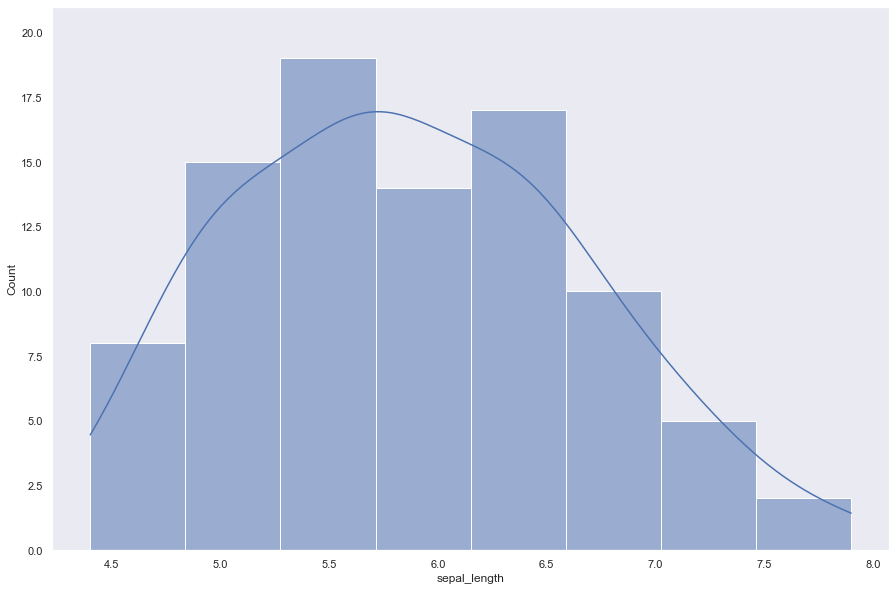

In [ ]:
plt.figure(figsize = (15, 10))
sns.set_theme(style = "dark")
sns.histplot(data = train_df, x = "sepal_length", kde = True)
plt.ylim(0, 21, 1)

Text(0.5, 0.1, 'Measurement')

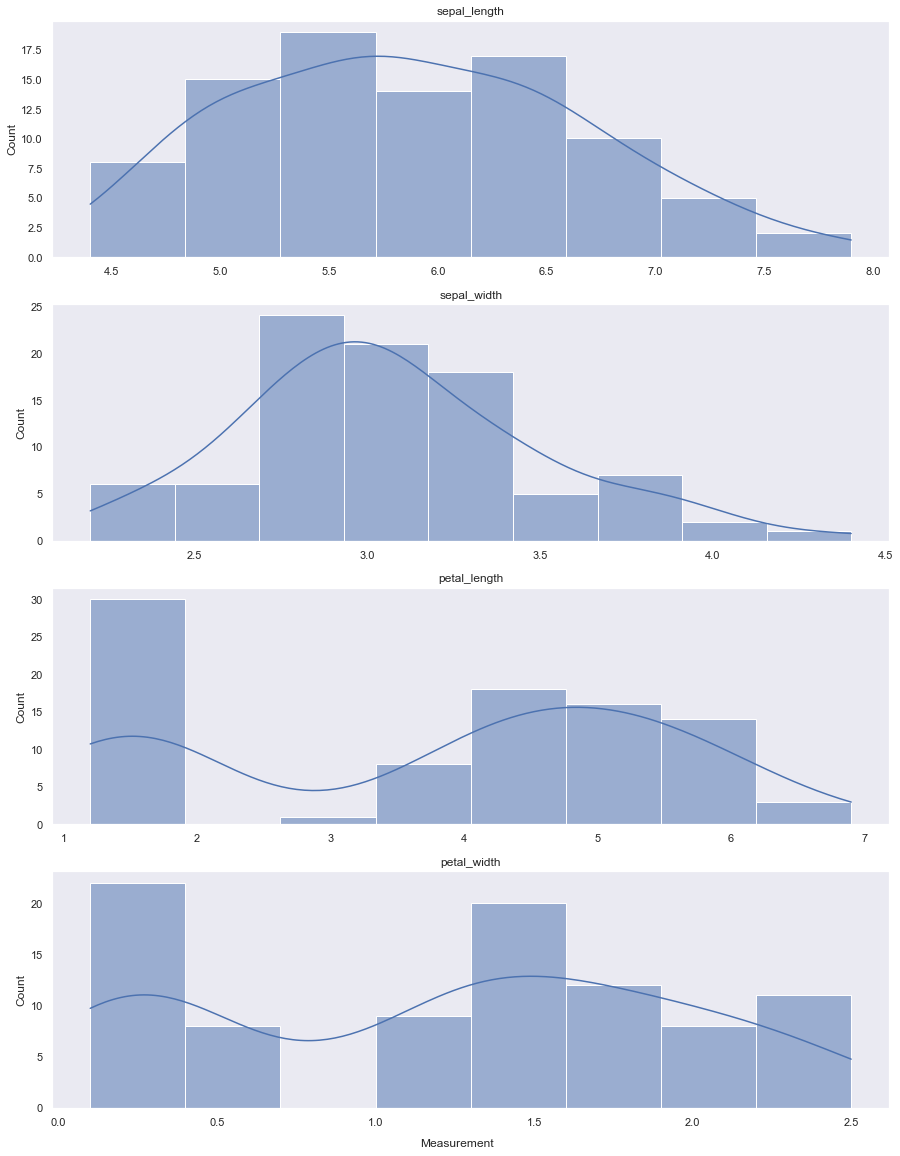

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 20))
for i, feature in enumerate(numerical_cols):
    sns.histplot(data=train_df, x = feature, ax=ax[i], alpha=0.5, kde = True)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Count')
    ax[i].set_title(feature)

fig.text(0.5, 0.1, 'Measurement', ha='center', va='center', fontsize = 12)